<a href="https://colab.research.google.com/github/SrVinicius/GeePython/blob/main/AnaliseAltitudeEspectral.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install earthengine-api -q

In [ ]:
!pip install geemap -q


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 38.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.5/130.5 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 53.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 52.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 60.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 50.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.4/55.4 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 51.2 MB/s eta 0:00:00


In [ ]:
import ee
import geemap

In [ ]:
ee.Authenticate()
ee.Initialize()

To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://code.earthengine.google.com/client-auth?scopes=https%3A//www.googleapis.com/auth/earthengine%20https%3A//www.googleapis.com/auth/devstorage.full_control&request_id=IrWkEnFMiSLKHAZalxBPYyVMuR8tjFzR0iZ45sgsOc8&tc=tfw7VvSEkJDfipMYsEd9qNmIoAzmFuLwbaqfFExYQyA&cc=ATGEoFAHcH-ZrNxNfbDBF53u9TfQ9Aq-OBDlzTirNqY

The authorization workflow will generate a code, which you should paste in the box below.
Enter verification code: 4/1AbUR2VOIHagvGcTPHRw0Gbhhu8BL3Rv7QOijDOW79sH12V2xib0OVKJ_L3U

Successfully saved authorization token.


In [ ]:

srtm = ee.Image("USGS/SRTMGL1_003")

Map = geemap.Map()
Map.addLayer(srtm)
Map

Map(center=[20, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(children=(Togg…

In [ ]:
vis = {
   'min':0,
   'max':2000,
   'palette':['9e0142', 'f88d52', 'ffffbf', '89d0a4', '5e4fa2']
}
Map = geemap.Map(location=('-18.08','-54.57'), zoom=5)
Map.addLayer(srtm, vis, 'SRTM')
Map

Map(center=['-18.08', '-54.57'], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(c…

In [ ]:
roi = ee.Geometry.Polygon(
        [[[-45.511644058569544, -21.513392310447216],
          [-45.511644058569544, -21.62545985463919],
          [-45.36847847019064, -21.62545985463919],
          [-45.36847847019064, -21.513392310447216]]])

task = ee.batch.Export.image.toDrive(image=srtm,region=roi,description='Srtm_varginha',folder='MinicursoGEE',fileNamePrefix='Srtm_varginha',scale=30,maxPixels=1e13,crs='EPSG:4674')
task.start()

In [ ]:
redutores = ee.Reducer.mean().combine(**{
    'reducer2':ee.Reducer.min(),
    'sharedInputs': True}).combine(**{
        'reducer2':ee.Reducer.max(),
        'sharedInputs':True})
    
estatistica_zonais = srtm.reduceRegion(**{
   'reducer': redutores,
   'geometry': roi,
   'scale': 30,
   'bestEffort': True,
   'maxPixels':1e13,
   'tileScale':4 
});

print(estatistica_zonais.getInfo());


{'elevation_max': 1106, 'elevation_mean': 887.3010179610859, 'elevation_min': 750}


In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt


In [ ]:
stats_list = ee.List(estatistica_zonais).getInfo()

data = list(stats_list.items())

df = pd.DataFrame(data, columns=['elevação','valor'])
df

,elevação,valor
0,elevation_max,1106.000000
1,elevation_mean,887.301018
2,elevation_min,750.000000


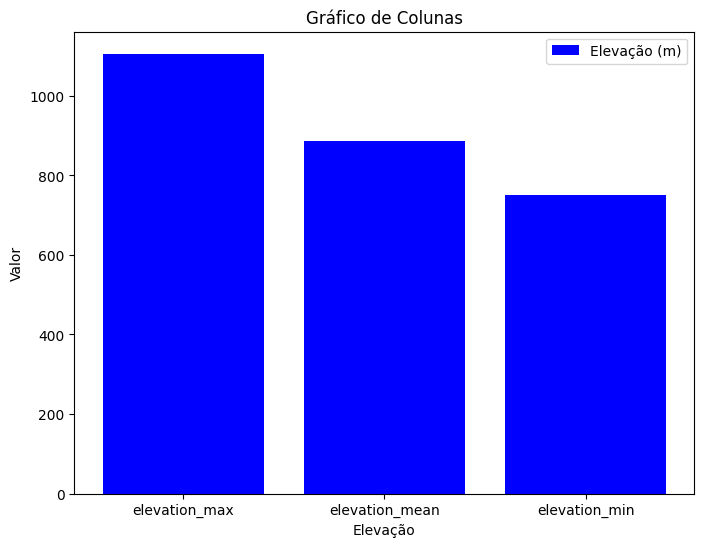

In [ ]:
values = df['valor']
labels = df['elevação']

plt.figure(figsize=(8,6))

plt.bar(labels,values, color='blue')

plt.xlabel('Elevação')
plt.ylabel('Valor')
plt.legend(['Elevação (m)'])
plt.title('Gráfico de Colunas')

plt.savefig('Gráfico_barra.png')

plt.show()

In [ ]:
!pip install rasterio -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 63.2 MB/s eta 0:00:00


In [ ]:
import rasterio as rio 
from rasterio.plot import show

In [ ]:
filename='/content/drive/MyDrive/MinicursoGEE/Srtm_varginha.tif'
raster = rio.open(filename)

In [ ]:
raster.meta

{'driver': 'GTiff',
 'dtype': 'int16',
 'nodata': None,
 'width': 532,
 'height': 417,
 'count': 1,
 'crs': CRS.from_epsg(4674),
 'transform': Affine(0.00026949458523585647, 0.0, -45.51170656546097,
        0.0, -0.00026949458523585647, -21.51321375020795)}

In [ ]:
data = raster.read(1)
data

array([[ 861,  858,  858, ..., 1086, 1092, 1098],
       [ 862,  862,  861, ..., 1087, 1090, 1093],
       [ 860,  860,  861, ..., 1081, 1083, 1085],
       ...,
       [ 926,  916,  902, ...,  890,  885,  881],
       [ 920,  909,  897, ...,  888,  883,  881],
       [ 912,  901,  885, ...,  887,  884,  879]], dtype=int16)

In [ ]:
extent = raster.bounds
extent

BoundingBox(left=-45.51170656546097, bottom=-21.625592992251303, right=-45.368335446115495, top=-21.51321375020795)

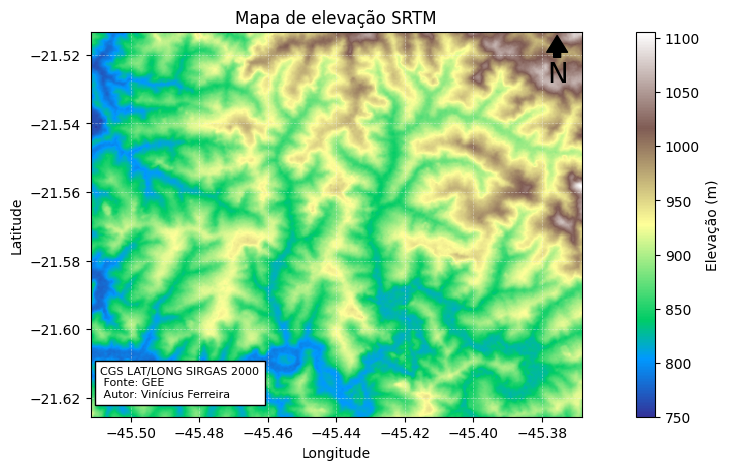

In [ ]:
## início criacao do mapa
fig, ax = plt.subplots(1,1, figsize=(14,5))

img = plt.imshow(data, cmap="terrain")
plt.colorbar(img, label="Elevação (m)")

show(raster, ax=ax, transform=raster.transform, cmap="terrain")
## fim criacao do mapa

##perfumaria
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Mapa de elevação SRTM")

ax.grid(color='0.95', linestyle='dashed', linewidth=0.5, alpha=0.5)

ax.text(0.02,0.05,'CGS LAT/LONG SIRGAS 2000''\n Fonte: GEE \n Autor: Vinícius Ferreira', transform=ax.transAxes, fontsize=8, bbox = dict(facecolor = 'white'))

x, y, arrow_lenght = 0.95, 0.99, 0.1

ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_lenght), arrowprops=dict(facecolor='black', width=5, headwidth=15), ha='center', va='center', fontsize=20, xycoords=ax.transAxes)

plt.savefig('MapaDeElevacao.jpg', dpi=300)

plt.show()